<a href="https://colab.research.google.com/github/Gaurav-phatkare/Classification-Models-Tensorflow/blob/main/Multilabel_classification_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Aug  1 03:56:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d alessiocorrado99/animals10

100% 585M/586M [00:32<00:00, 23.1MB/s]
100% 586M/586M [00:32<00:00, 18.8MB/s]


In [ ]:
!unzip /content/animals10.zip

In [9]:
for dirpath, dirnames, filenames in os.walk("/content/raw-img"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 0 images in '/content/raw-img'.
There are 0 directories and 1446 images in '/content/raw-img/elefante'.
There are 0 directories and 1668 images in '/content/raw-img/gatto'.
There are 0 directories and 4863 images in '/content/raw-img/cane'.
There are 0 directories and 1862 images in '/content/raw-img/scoiattolo'.
There are 0 directories and 1866 images in '/content/raw-img/mucca'.
There are 0 directories and 1820 images in '/content/raw-img/pecora'.
There are 0 directories and 2112 images in '/content/raw-img/farfalla'.
There are 0 directories and 2623 images in '/content/raw-img/cavallo'.
There are 0 directories and 4821 images in '/content/raw-img/ragno'.
There are 0 directories and 3098 images in '/content/raw-img/gallina'.


In [10]:
!mkdir Animal10_dataset

In [11]:
cd Animal10_dataset

/content/Animal10_dataset


In [12]:
pwd

'/content/Animal10_dataset'

In [13]:
!mkdir train
!mkdir test

In [14]:
cd train

/content/Animal10_dataset/train


In [15]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}


In [16]:
!mkdir cane-dog
!mkdir cavallo-horse
!mkdir elefante-elephant
!mkdir farfalla-butterfly
!mkdir gallina-chicken
!mkdir gatto-cat
!mkdir mucca-cow
!mkdir pecora-sheep
!mkdir scoiattolo-squirrel
!mkdir ragno-spider

In [17]:
cd /content/Animal10_dataset/test

/content/Animal10_dataset/test


In [18]:
!mkdir cane-dog
!mkdir cavallo-horse
!mkdir elefante-elephant
!mkdir farfalla-butterfly
!mkdir gallina-chicken
!mkdir gatto-cat
!mkdir mucca-cow
!mkdir pecora-sheep
!mkdir scoiattolo-squirrel
!mkdir ragno-spider

In [19]:
import os
import random
import shutil

def split_data(source_folder, train_folder, test_folder, train_ratio = 0.8):

    image_files = [file for file in os.listdir(source_folder) if file.endswith(('.jpg','.jpeg','.png'))]

    num_train = int(len(image_files) * train_ratio)
    num_test = len(image_files) - num_train

    random.shuffle(image_files)


    for file in image_files[:num_train]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(train_folder, file)
        shutil.copyfile(source_path, destination_path)

    for file in image_files[num_train:]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(test_folder, file)
        shutil.copyfile(source_path, destination_path)

In [20]:
source_folder_cane = "/content/raw-img/cane"
source_folder_cavallo = "/content/raw-img/cavallo"
source_folder_elefante = "/content/raw-img/elefante"
source_folder_farfalla = '/content/raw-img/farfalla'
source_folder_gallina = "/content/raw-img/gallina"
source_folder_gatto = "/content/raw-img/gatto"
source_folder_mucca = "/content/raw-img/mucca"
source_folder_pecora = "/content/raw-img/pecora"
source_folder_scoiattolo = "/content/raw-img/scoiattolo"
source_folder_ragno = "/content/raw-img/ragno"

In [21]:
split_data(source_folder_cane,"/content/Animal10_dataset/train/cane-dog","/content/Animal10_dataset/test/cane-dog")
split_data(source_folder_cavallo,"/content/Animal10_dataset/train/cavallo-horse","/content/Animal10_dataset/test/cavallo-horse")
split_data(source_folder_elefante,"/content/Animal10_dataset/train/elefante-elephant","/content/Animal10_dataset/test/cane-dog")
split_data(source_folder_farfalla,"/content/Animal10_dataset/train/farfalla-butterfly","/content/Animal10_dataset/test/farfalla-butterfly")
split_data("/content/raw-img/gallina","/content/Animal10_dataset/train/gallina-chicken","/content/Animal10_dataset/test/gallina-chicken")
split_data(source_folder_gatto,"/content/Animal10_dataset/train/gatto-cat","/content/Animal10_dataset/test/gatto-cat")
split_data(source_folder_mucca,"/content/Animal10_dataset/train/mucca-cow","/content/Animal10_dataset/test/mucca-cow")
split_data(source_folder_pecora,"/content/Animal10_dataset/train/pecora-sheep","/content/Animal10_dataset/test/pecora-sheep")
split_data(source_folder_scoiattolo,"/content/Animal10_dataset/train/scoiattolo-squirrel","/content/Animal10_dataset/test/scoiattolo-squirrel")
split_data(source_folder_ragno,"/content/Animal10_dataset/train/ragno-spider","/content/Animal10_dataset/test/ragno-spider")

In [22]:
for dirpath, dirnames, filenames in os.walk("/content/Animal10_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/Animal10_dataset'.
There are 10 directories and 0 images in '/content/Animal10_dataset/train'.
There are 0 directories and 1492 images in '/content/Animal10_dataset/train/mucca-cow'.
There are 0 directories and 1334 images in '/content/Animal10_dataset/train/gatto-cat'.
There are 0 directories and 2478 images in '/content/Animal10_dataset/train/gallina-chicken'.
There are 0 directories and 1156 images in '/content/Animal10_dataset/train/elefante-elephant'.
There are 0 directories and 1489 images in '/content/Animal10_dataset/train/scoiattolo-squirrel'.
There are 0 directories and 3890 images in '/content/Animal10_dataset/train/cane-dog'.
There are 0 directories and 3856 images in '/content/Animal10_dataset/train/ragno-spider'.
There are 0 directories and 1689 images in '/content/Animal10_dataset/train/farfalla-butterfly'.
There are 0 directories and 1456 images in '/content/Animal10_dataset/train/pecora-sheep'.
There are 0 directories a

In [23]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Animal10_dataset/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cane-dog' 'cavallo-horse' 'elefante-elephant' 'farfalla-butterfly'
 'gallina-chicken' 'gatto-cat' 'mucca-cow' 'pecora-sheep' 'ragno-spider'
 'scoiattolo-squirrel']


In [24]:
# view random images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder),1)

    image = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");

    print(f'Image shape:{image.shape}')

    return image

Image shape:(200, 300, 3)


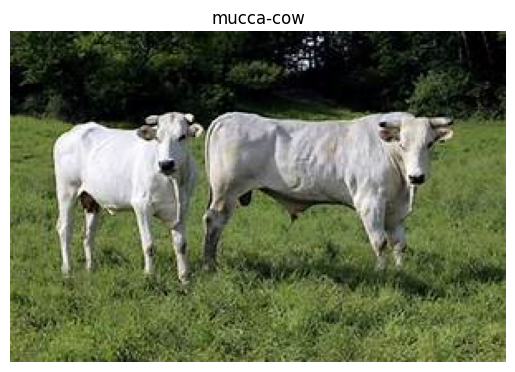

In [29]:
img = view_random_image(target_dir = '/content/Animal10_dataset/train/',
                        target_class = "mucca-cow")


In [30]:
# define training and testing directory paths

train_dir = '/content/Animal10_dataset/train'
test_dir = '/content/Animal10_dataset/test'

In [31]:

# rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 20,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          horizontal_flip = True)

# without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)


# test instances without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [32]:
# Augment the data

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical',
                                                                  shuffle = True)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 20938 images belonging to 10 classes.
Found 20938 images belonging to 10 classes.
Found 5241 images belonging to 10 classes.


(-0.5, 223.5, 223.5, -0.5)

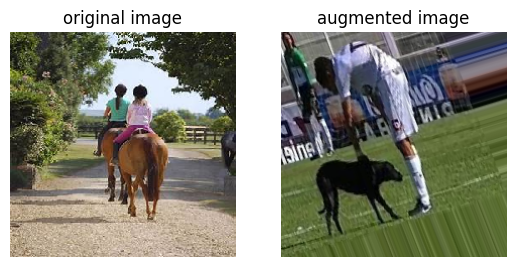

In [33]:

# visualize the data

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()


# random_number = random.randint(0, 32)

plt.figure()
plt.subplot(1,2,1)

plt.imshow(images[12])
plt.title('original image')
plt.axis(False)



plt.subplot(1,2,2)
plt.imshow(augmented_images[12])
plt.title('augmented image')
plt.axis(False)

# Model 0: baseline model with Data Augmentation

In [34]:
train_data_augmented.num_classes

10

In [35]:
# build a model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [36]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [37]:
history_0 = model_0.fit(train_data_augmented,
                        epochs = 6,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
655/655 [==============================] - 289s 421ms/step - loss: 1.9271 - accuracy: 0.3177 - val_loss: 1.7927 - val_accuracy: 0.3828
Epoch 2/6
655/655 [==============================] - 262s 399ms/step - loss: 1.7620 - accuracy: 0.3869 - val_loss: 1.5427 - val_accuracy: 0.4711
Epoch 3/6
655/655 [==============================] - 262s 400ms/step - loss: 1.6858 - accuracy: 0.4150 - val_loss: 1.5266 - val_accuracy: 0.4688
Epoch 4/6
655/655 [==============================] - 262s 400ms/step - loss: 1.6262 - accuracy: 0.4364 - val_loss: 1.4644 - val_accuracy: 0.5003
Epoch 5/6
655/655 [==============================] - 255s 389ms/step - loss: 1.5822 - accuracy: 0.4530 - val_loss: 1.4059 - val_accuracy: 0.5146
Epoch 6/6
655/655 [==============================] - 259s 396ms/step - loss: 1.5417 - accuracy: 0.4704 - val_loss: 1.3616 - val_accuracy: 0.5386


In [38]:
# helper function
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))




  plt.figure(figsize = (8,4))
  plt.subplot(1,2,1)

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)


  # Plot accuracy
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

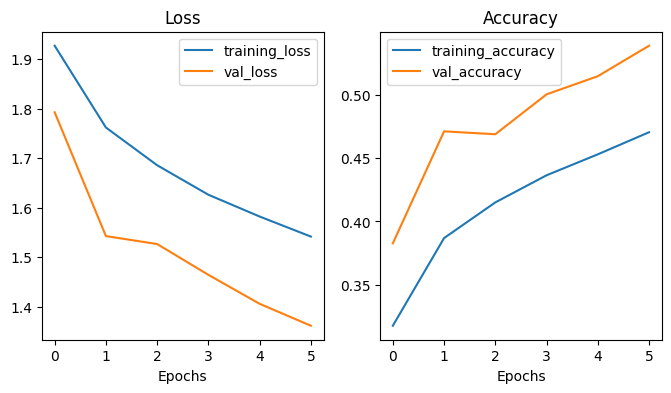

In [39]:
plot_loss_curves(history_0)

# model 1: hyperparameter tuning

In [40]:
# build a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),


    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    # tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [41]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 104, 104, 10)      910       
                                                      

In [42]:
history_1 = model_1.fit(train_data_augmented,
                        epochs = 6,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
655/655 [==============================] - 276s 414ms/step - loss: 2.0807 - accuracy: 0.2535 - val_loss: 1.7882 - val_accuracy: 0.3637
Epoch 2/6
655/655 [==============================] - 273s 417ms/step - loss: 1.8618 - accuracy: 0.3475 - val_loss: 1.6629 - val_accuracy: 0.4209
Epoch 3/6
655/655 [==============================] - 271s 413ms/step - loss: 1.6978 - accuracy: 0.4112 - val_loss: 1.5084 - val_accuracy: 0.4846
Epoch 4/6
655/655 [==============================] - 267s 408ms/step - loss: 1.6016 - accuracy: 0.4461 - val_loss: 1.5109 - val_accuracy: 0.4583
Epoch 5/6
655/655 [==============================] - 270s 412ms/step - loss: 1.5255 - accuracy: 0.4713 - val_loss: 1.4170 - val_accuracy: 0.5096
Epoch 6/6
655/655 [==============================] - 271s 413ms/step - loss: 1.4761 - accuracy: 0.4893 - val_loss: 1.4194 - val_accuracy: 0.5043


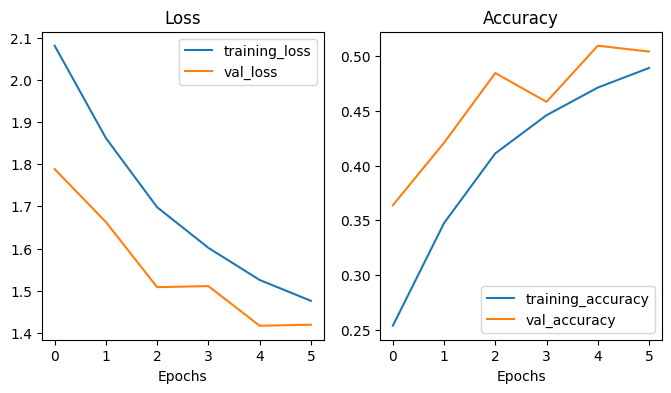

In [43]:
plot_loss_curves(history_1)

from now we will use two models from tensorflow Hub:
1. ResNetV2 - a state of the art computer vision model architecture from 2016.
https://arxiv.org/abs/1603.05027
2. EfficientNet - a state of the art computer vision architecture from 2019.
https://arxiv.org/abs/1603.05027

# model 2: Resnet V2

In [44]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [45]:
# resnet 50 v2 url
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [46]:
def create_model(model_url, num_classes = 10):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = True,
                                           name = 'feature_extraction_layer',
                                           input_shape = (224,224,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

In [47]:
resnet_model = create_model(resnet_url)

# compile a model
resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [48]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 23,539,850
Non-trainable params: 45,440
_________________________________________________________________


In [49]:
# fit the model
resnet_history = resnet_model.fit(train_data_augmented,
                                  epochs = 6,
                                  steps_per_epoch=len(train_data),
                                  validation_steps=len(test_data),
                                  validation_data = test_data)

Epoch 1/6
655/655 [==============================] - 382s 524ms/step - loss: 1.3805 - accuracy: 0.6634 - val_loss: 1.7172 - val_accuracy: 0.6310
Epoch 2/6
655/655 [==============================] - 338s 516ms/step - loss: 1.1058 - accuracy: 0.7749 - val_loss: 1.5538 - val_accuracy: 0.6804
Epoch 3/6
655/655 [==============================] - 338s 515ms/step - loss: 1.0579 - accuracy: 0.8071 - val_loss: 2.1393 - val_accuracy: 0.6020
Epoch 4/6
655/655 [==============================] - 337s 514ms/step - loss: 1.0512 - accuracy: 0.8221 - val_loss: 1.8353 - val_accuracy: 0.7067
Epoch 5/6
655/655 [==============================] - 336s 513ms/step - loss: 1.0467 - accuracy: 0.8342 - val_loss: 1.6553 - val_accuracy: 0.7516
Epoch 6/6
655/655 [==============================] - 342s 522ms/step - loss: 1.0466 - accuracy: 0.8375 - val_loss: 1.5120 - val_accuracy: 0.7403


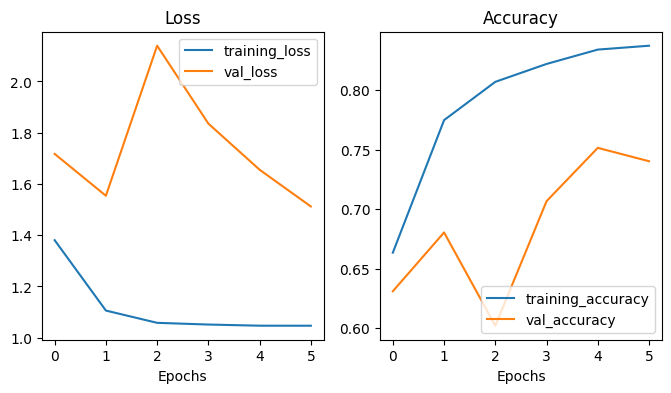

In [50]:
plot_loss_curves(resnet_history)

# model 3: EfficientNet model

In [51]:
efficientNet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [52]:
# create the model

efficientNet_model = create_model(model_url = efficientNet_url, num_classes = 10)

efficientNet_model.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

efficientNet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 4,020,358
Non-trainable params: 42,016
_________________________________________________________________


In [53]:
# fit the model

efficient_history = efficientNet_model.fit(
    train_data_augmented,
    epochs = 6,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/6
655/655 [==============================] - 367s 480ms/step - loss: 0.5142 - accuracy: 0.8835 - val_loss: 1.1401 - val_accuracy: 0.8813
Epoch 2/6
655/655 [==============================] - 312s 475ms/step - loss: 0.3927 - accuracy: 0.9206 - val_loss: 1.0463 - val_accuracy: 0.8447
Epoch 3/6
655/655 [==============================] - 312s 477ms/step - loss: 0.3538 - accuracy: 0.9313 - val_loss: 0.8561 - val_accuracy: 0.8718
Epoch 4/6
655/655 [==============================] - 301s 460ms/step - loss: 0.3438 - accuracy: 0.9381 - val_loss: 1.2904 - val_accuracy: 0.8792
Epoch 5/6
655/655 [==============================] - 302s 461ms/step - loss: 0.3239 - accuracy: 0.9441 - val_loss: 1.0700 - val_accuracy: 0.8779
Epoch 6/6
655/655 [==============================] - 301s 460ms/step - loss: 0.3134 - accuracy: 0.9480 - val_loss: 1.2722 - val_accuracy: 0.8859


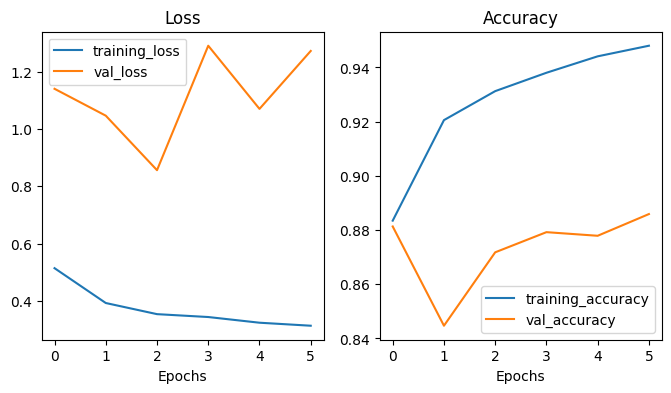

In [55]:
plot_loss_curves(efficient_history)

In [56]:
# Try to get better model by setting trainable layers False
def create_model(model_url, num_classes = 10):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'feature_extraction_layer',
                                           input_shape = (224,224,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

## Efficient net model

In [57]:
efficientNet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [59]:
# create the model

efficientNet_model_01 = create_model(model_url = efficientNet_url, num_classes = 10)

efficientNet_model_01.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

efficientNet_model_01.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [60]:
# fit the model

efficient_history_01 = efficientNet_model_01.fit(
    train_data_augmented,
    epochs = 6,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/6
655/655 [==============================] - 285s 420ms/step - loss: 0.2687 - accuracy: 0.9348 - val_loss: 0.5440 - val_accuracy: 0.9160
Epoch 2/6
655/655 [==============================] - 273s 417ms/step - loss: 0.1146 - accuracy: 0.9679 - val_loss: 0.5779 - val_accuracy: 0.9197
Epoch 3/6
655/655 [==============================] - 281s 429ms/step - loss: 0.1020 - accuracy: 0.9697 - val_loss: 0.6196 - val_accuracy: 0.9208
Epoch 4/6
655/655 [==============================] - 275s 420ms/step - loss: 0.0894 - accuracy: 0.9744 - val_loss: 0.6355 - val_accuracy: 0.9214
Epoch 5/6
655/655 [==============================] - 273s 416ms/step - loss: 0.0828 - accuracy: 0.9748 - val_loss: 0.6466 - val_accuracy: 0.9216
Epoch 6/6
655/655 [==============================] - 310s 473ms/step - loss: 0.0736 - accuracy: 0.9782 - val_loss: 0.6838 - val_accuracy: 0.9214


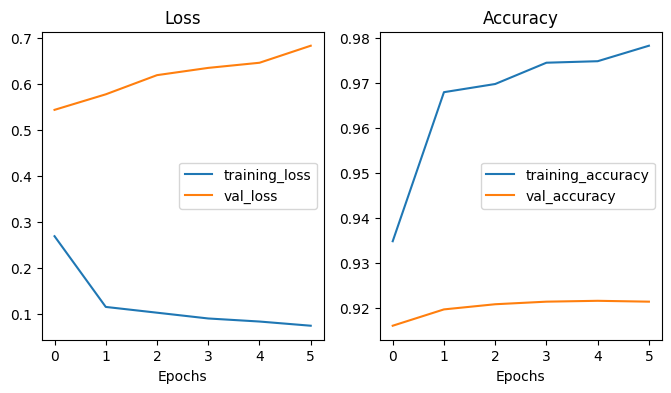

In [61]:
plot_loss_curves(efficient_history_01)

# model 4: Mobilenet layers

In [62]:
imagenet_mobileNet_url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'

In [63]:
# setting trainable layers to false
def create_model(model_url, num_classes = 10):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'feature_extraction_layer',
                                           input_shape = (224,224,3))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation ='softmax',name = 'output_layer')

  ])

  return model

In [64]:
# create the model

mobileNet_model_01 = create_model(model_url = imagenet_mobileNet_url, num_classes = 10)

mobileNet_model_01.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])

mobileNet_model_01.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [65]:
# fit the model

mobileNet_history_01 = mobileNet_model_01.fit(
    train_data_augmented,
    epochs = 6,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/6
655/655 [==============================] - 268s 404ms/step - loss: 0.3297 - accuracy: 0.9015 - val_loss: 0.6522 - val_accuracy: 0.8981
Epoch 2/6
655/655 [==============================] - 276s 422ms/step - loss: 0.1891 - accuracy: 0.9416 - val_loss: 0.7210 - val_accuracy: 0.9021
Epoch 3/6
655/655 [==============================] - 272s 415ms/step - loss: 0.1682 - accuracy: 0.9471 - val_loss: 0.7678 - val_accuracy: 0.9015
Epoch 4/6
655/655 [==============================] - 277s 423ms/step - loss: 0.1500 - accuracy: 0.9519 - val_loss: 0.7140 - val_accuracy: 0.9038
Epoch 5/6
655/655 [==============================] - 269s 410ms/step - loss: 0.1484 - accuracy: 0.9528 - val_loss: 0.7361 - val_accuracy: 0.9023
Epoch 6/6
655/655 [==============================] - 286s 437ms/step - loss: 0.1492 - accuracy: 0.9528 - val_loss: 0.6705 - val_accuracy: 0.9048


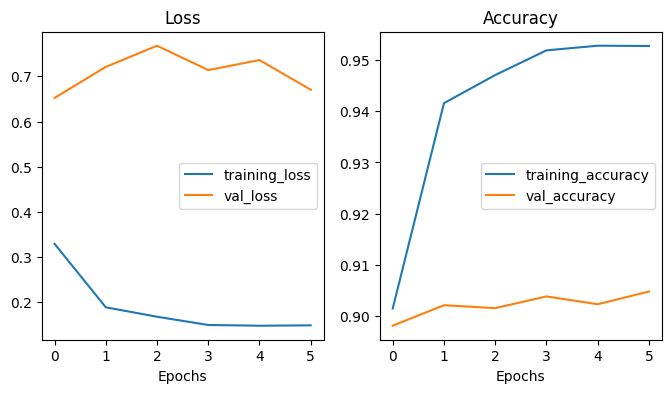

In [66]:
plot_loss_curves(mobileNet_history_01)